## Install Dependencies


### torch, torchvision

In [1]:
# install torch and torchvision
!pip3 install torch torchvision torchaudio torchtext --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


### pytorch3d

In [2]:
import os
import torch

try:
    import pytorch3d
except ModuleNotFoundError:
    !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
    !tar xzf 1.10.0.tar.gz
    os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
    !pip install git+https://github.com/facebookresearch/pytorch3d.git

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  404k    0  404k    0     0   845k      0 --:--:-- --:--:-- --:--:--  845k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/pytorch3d.git to /tmp/pip-req-build-aryz9sxe
  Running command git clone -q https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-aryz9sxe
     |████████████████████████████████| 50 kB 3.3 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
  Created wheel for pytorch3d: filename=pytorch3d-0.7.2-cp38-cp38-linux_x86_64.whl size=51597655 sha256=0ead4f46b31e4860ed4aad8d9b933a577b8aee4ccbc877fb1aa3d94ce6cc007c
  Stored in directory: /tmp/pip-ephem-wheel-cache-cmpledqh/wheels/5e/a7/7c/814c3888eaaecaaf0f533faeb3c68

In [3]:
import pytorch3d
pytorch3d.__version__

'0.7.2'

### SMPL / Meshes

In [4]:
!pip install smplpytorch
!pip install chumpy
!pip install trimesh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.5 MB/s 
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58286 sha256=68469605c63891387b22e158d02947cfcd3dca45a3f510df3b2e232296f9de09
  Stored in directory: /root/.cache/pip/wheels/d9/a2/b8/b8aeeeaeb01b5002085156add1aed832f2fb03e79d0f22dfed
Successfully built chumpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 669 kB 4.9 MB/s 


### CLIP

In [5]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-8jmy7o41
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-8jmy7o41
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369408 sha256=21f54aa658ed816e94ae0b8b7f15446e8b262f159831902a66efc7675f10bb7a
  Stored in directory: /tmp/pip-ephem-wheel-cache-i7j7_x4e/wheels/ab/4f/3a/5e51521b55997aa6f0690e095c08824219753128ce8d9969a3
Successfully built clip


### LATEX

In [45]:
!sudo apt-get install texlive-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  aglfn asymptote asymptote-doc biber chktex cm-super cm-super-minimal context
  context-modules dvidvi dvipng emacsen-common feynmf fonts-adf-accanthis
  fonts-adf-berenis fonts-adf-gillius fonts-adf-universalis
  fonts-arphic-bkai00mp fonts-arphic-bsmi00lp fonts-arphic-gbsn00lp
  fonts-arphic-gkai00mp fonts-baekmuk fonts-cabin fonts-comfortaa
  fonts-croscore fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-baskerville
  fonts-gfs-bodoni-classic fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-didot-classic fonts-g

## GPU

In [6]:
import torch

torch.cuda.is_available()

True

In [7]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [8]:
# GPU or CPU
gpu, cpu = None, None
if torch.cuda.is_available():
    gpu = torch.device("cuda:0")
    torch.cuda.set_device(gpu)
else:
    cpu = torch.device("cpu")
dev = gpu if gpu is not None else cpu
dev

device(type='cuda', index=0)

## Setup

### Codebase Loading

In [79]:
!rm -rf project #remove if it already exists 
!git clone https://github.com/B4Farouk/smpl-dr-clip project
!rm -rf sample_data

Cloning into 'project'...
remote: Enumerating objects: 844, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 844 (delta 125), reused 204 (delta 113), pack-reused 622
Receiving objects: 100% (844/844), 76.01 MiB | 38.86 MiB/s, done.
Resolving deltas: 100% (493/493), done.


### Local Imports 

In [62]:
from project.aux_functions import *

from project.smpl import SMPLwrapper, mesh_from
from project.textures import TexturesFactory
from project.rendering import CamerasFactory, Renderer
from project.clipwrapper import CLIPwrapper

from project.optimization import OptimEnv, OptimConfig, TrackerConfig, init_weights
from project.model import compose, SimpledCLIPContext

import trimesh

import clip

import numpy as np

from torch.nn.functional import cosine_similarity

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test: SMPL and Rendering

In [70]:
# initalize a textures factory
txfactory = TexturesFactory(device=dev)
colored_reference_SMPL = trimesh.load("project/SMPL_female_with_colors.obj", process=False)
# use the texture factory to create a texture generator: a function that takes faces and creates a texture
def texture_generator(verts,faces):
  return txfactory.from_image(colored_reference_SMPL ,verts, faces)
# pose and shape initalization
pose_vect = torch.zeros((1, 72), device=dev) # theta, used in optimization
shape_vect = torch.ones((1, 10), device=dev) # beta, not used in optimization
# create the smpl model
smpl_model = SMPLwrapper(model=None, batchsize=5, txmapping=texture_generator, device=dev) #model=None uses the default model
# create the mesh
meshes = smpl_model.meshes(theta=pose_vect, beta=shape_vect)

In [71]:
# create a cameras factory
camsfactory = CamerasFactory(device=dev)
# cameras' spherical coordinates
radiuses = [2.25]*5
azimuths = (0, 45, 135, -45, -135)
elevations = [5]*5
coords = (radiuses, azimuths, elevations)
# create cameras using cameras factory
cameras = camsfactory.fov_persp_scs(coords=coords, fov=60, frustrum_depth=(0.1, 100))
# create a renderer
renderer = Renderer(device=dev, cameras=cameras)
# render the textured meshes generated by SMPL
test_imgs_t = renderer.render(meshes)
# shape of the rendered images
test_imgs_t.shape

torch.Size([5, 244, 244, 4])

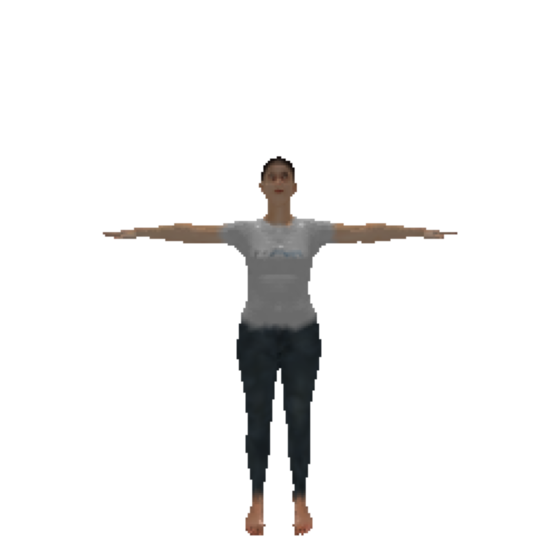

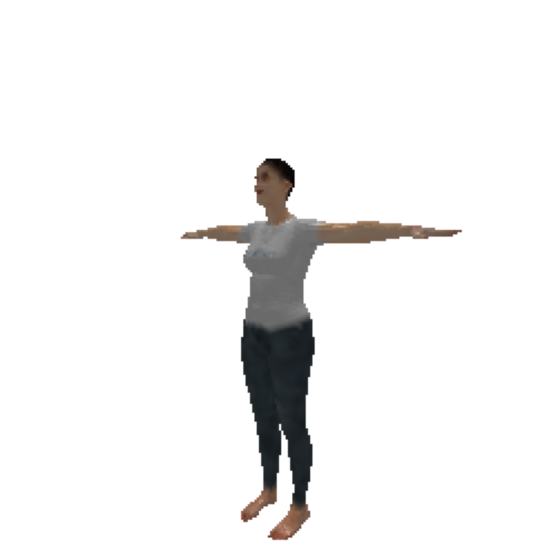

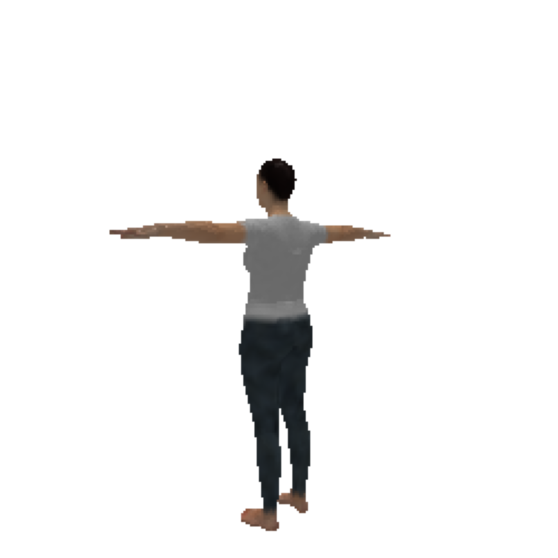

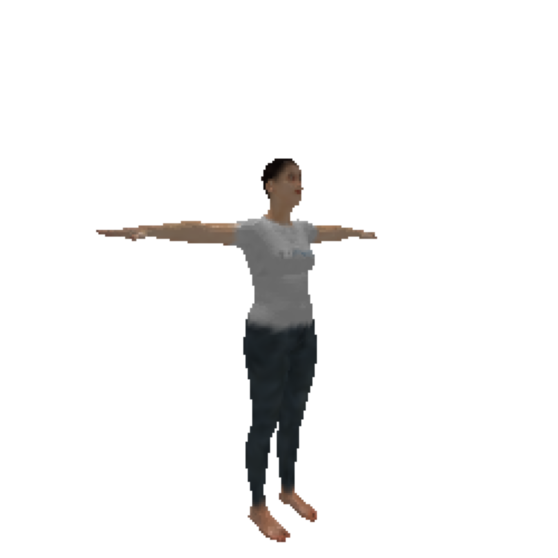

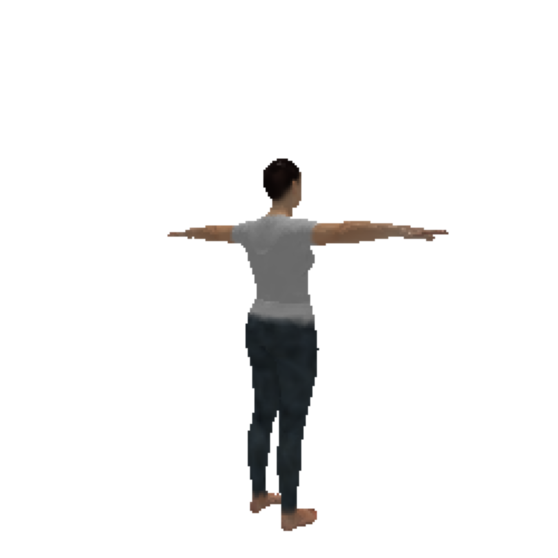

In [50]:
# a quick visualization of the rendered mesh
for test_img_t in test_imgs_t:
  plot_image_t(test_img_t)

## Test: CLIP

In [51]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [52]:
clip_model = CLIPwrapper(model_name="ViT-B/32", device=dev)

#### Test: Our Implementation of CLIP Image Preprocessing

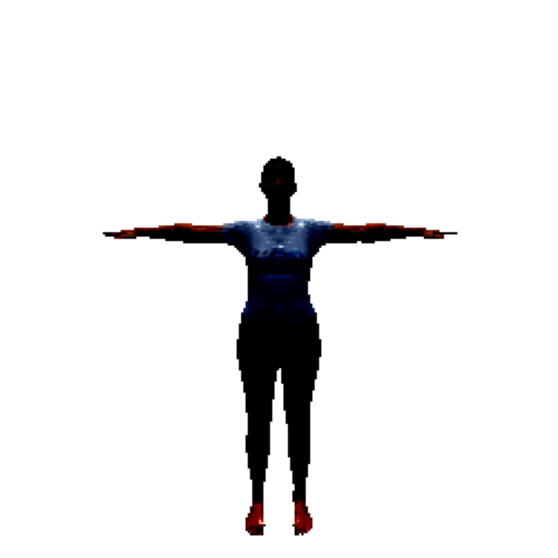

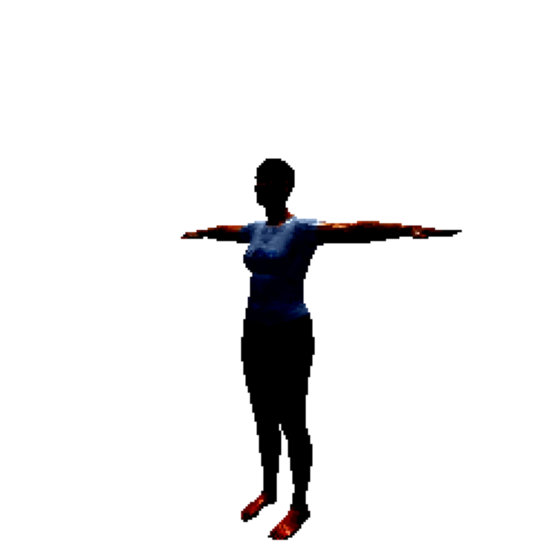

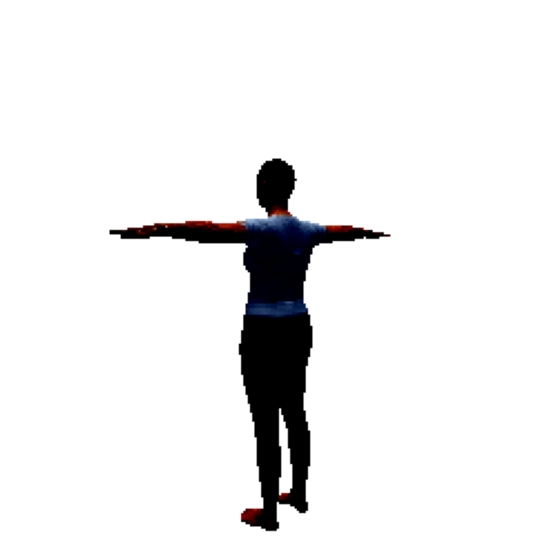

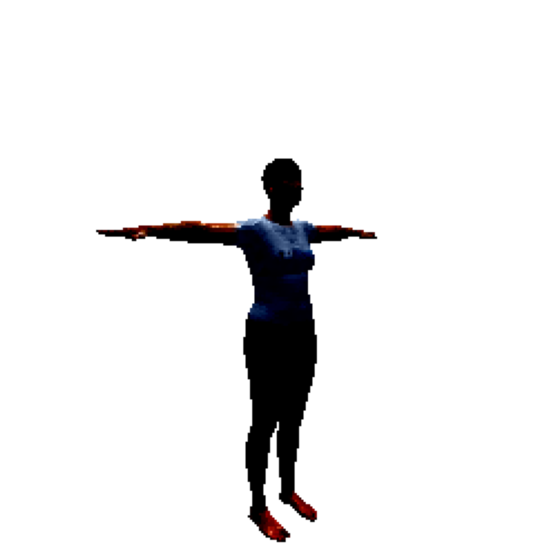

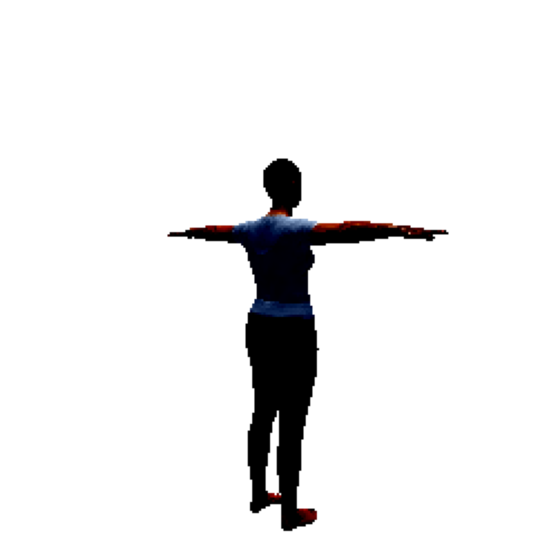

In [53]:
proc_test_imgs_t = torch.permute(clip_model.proc_imgs(test_imgs_t), (0, 2, 3, 1)) # N 3 W H => N W H 3 so 0 1 2 3 => 0 2 3 1
# a quick visualization of the processed images (matplotlib automatically clamps the pixels)
for proc_test_img_t in proc_test_imgs_t:
  plot_image_t(proc_test_img_t)

#### Test: How much does CLIP recognize our mesh and the position it is in ?

In [54]:
# a prompt describing the previous image
pmt_emb = clip_model.pmt_emb("""a brown female person wearing a grey T-shirt and dark pants. The background is white. She is looking upfront and is standing up straight with both feet and hands flat. Both her arms are straight and symmetrically apart from each other while at the shoulders' level.""")
imgs_embs = clip_model.imgs_embs(test_imgs_t)

In [55]:
imgs_embs.shape, pmt_emb.shape

(torch.Size([5, 512]), torch.Size([1, 512]))

In [56]:
img_emb = imgs_embs.mean(axis=0, keepdims=True)
float(cos_dist(img_emb, pmt_emb))

0.65234375

In [57]:
cosine_distances = torch.Tensor([cos_dist(img_emb.unsqueeze(0), pmt_emb) for img_emb in imgs_embs])
cosine_distances

tensor([0.6343, 0.6577, 0.6528, 0.6724, 0.6709])

In [58]:
float(cosine_distances.mean())

0.6576172113418579

## Prompts

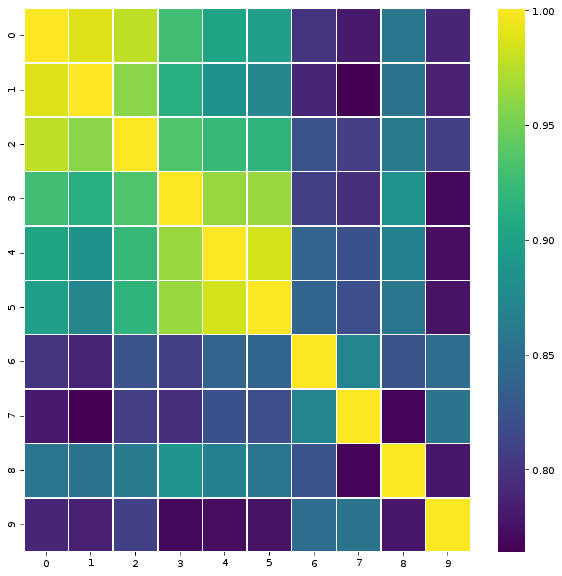

In [59]:
BASE_PROMPT = "a brown person wearing a grey T-shirt and dark pants. The background is white."

POSE_DESCS = [
    # set 1
    "She is looking upfront and is standing up straight with both feet and hands flat. Both her arms are straight and symmetrically apart from each other while at the shoulders' level.",
    "Both her arms are straight and symmetrically apart from each other at the shoulders' level. She is looking upfront and is standing up straight, with both feet and hands flat.",
    # set 2
    "She is looking upfront and is standing up straight with both feet and hands flat. Both her arms are straight above her head.",
    "She is standing up straight on her flat feet. She is looking upfront while grabbing her hips with both hands.",
    "She is standing up on her flat feet and leaning backwards.",
    "She is standing up straight on her flat feet.",
    # set 3
    "She is sitting.",
    "She is running",
    "She is bowing forward with both her hands flat on her thighs and her face facing the ground.",
    # control
    ""
]

TEST_PMTS = [BASE_PROMPT+desc for desc in POSE_DESCS]
N_TEST_PMTS = len(POSE_DESCS)

test_pmts_sim_matrix = np.zeros((N_TEST_PMTS, N_TEST_PMTS))
for i in range(N_TEST_PMTS):
  ref = clip_model.pmt_emb(POSE_DESCS[i])
  for j in range(N_TEST_PMTS):
    test_pmts_sim_matrix[i, j] = cosine_similarity(clip_model.pmt_emb(POSE_DESCS[j]), ref)

fig, ax = plot_heatmap(test_pmts_sim_matrix)


In [67]:
save_for_latex(fig, "prompt_heatmap")

## MODELS


In [28]:
# create a model factory
model_context = SimpledCLIPContext(smpl_model, renderer, clip_model)
MODELS = [model_context.get_model(prompt=pmt) for pmt in TEST_PMTS]

In [29]:
# sanity check
with torch.no_grad():
  test_pose, test_shape = init_weights(dev)
  test_imgs_embs, test_pmt_emb = MODELS[0](test_pose, test_shape)
test_imgs_embs.shape, test_pmt_emb.shape

(torch.Size([5, 512]), torch.Size([1, 512]))

### Optimization

In [130]:
INNER_PRODUCT_LOSS = lambda imgs_embs, pmt_emb: 1e-3 * (imgs_embs**2).sum(dim=1, keepdim=True) -  imgs_embs @ pmt_emb.T

def run_optimization(model, loss_mode, loss_fn=None, n_passes=1000):
  # configs
  trackerconfig = TrackerConfig()
  if loss_fn is None: # use default loss function: cosine distance
    optimconfig = OptimConfig(loss_mode=loss_mode)
  else:
    optimconfig = OptimConfig(loss_mode=loss_mode, loss_fn=loss_fn)
  # weights used in optimization
  pose, shape = init_weights(device=dev)
  # optimize with respect to the pose only
  optimenv = OptimEnv(model=model, weights=[pose], config=optimconfig) 
  result = optimenv.optimize(pose=pose, shape=shape, n_passes=n_passes, trackerconfig=trackerconfig)
  return result

def intermediate_views(result, coords):
  visu_smpl_model = SMPLwrapper(model=None, batchsize=1, txmapping=texture_generator, device=dev) #model=None uses the default model
  visu_camera = camsfactory.fov_persp_scs(coords=coords, fov=60, frustrum_depth=(1, 100))
  visu_renderer = Renderer(cameras=visu_camera, device=dev)
  
  pose_shape = zip(result["tracked"]["poses"]["pose"], result["tracked"]["shapes"]["shape"])
  for pose, shape in pose_shape:
    pose, shape = pose.to(dev), shape.to(dev)
    mesh = visu_smpl_model.meshes(theta=pose, beta=shape)
    image = visu_renderer.render(mesh)
    plot_image_t(image.squeeze())

def best_intermediate_result(result):
  best = {}

  minloss = result["tracked"]["losses"]["loss"].min()
  best_loss_entry = result["tracked"]["losses"].query("loss == @minloss")
 
  best["loss"] = minloss
  best["pass"] = best_loss_entry["pass"].values[0]
  best["pose"] = result["tracked"]["poses"].iloc[best_loss_entry.index[0]]["pose"]
  
  return best

### Results

In [83]:
p2_iploss_aloe = run_optimization(model=MODELS[2], loss_fn=INNER_PRODUCT_LOSS, n_passes=1000, loss_mode="average-loss-on-embeddings")

In [84]:
p2_iploss_loae = run_optimization(model=MODELS[2], loss_fn=INNER_PRODUCT_LOSS, n_passes=1000, loss_mode="loss-on-average-embedding")

In [85]:
p2_cosloss_aloe = run_optimization(model=MODELS[2], n_passes=1000, loss_mode="average-loss-on-embeddings")

In [86]:
p2_cosloss_loae = run_optimization(model=MODELS[2], n_passes=1000, loss_mode="loss-on-average-embedding")

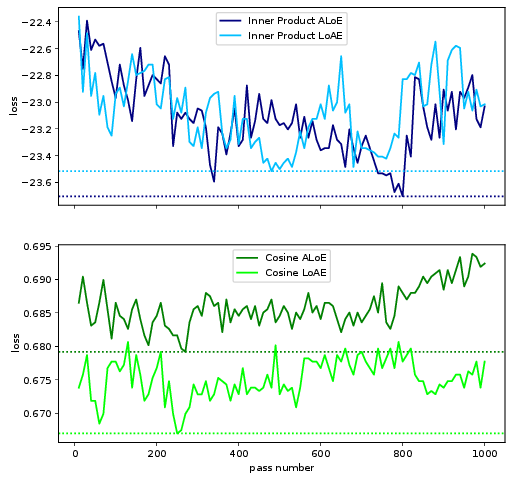

In [154]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

results_list = [p2_iploss_aloe, p2_iploss_loae]
labels_list = ["Inner Product ALoE", "Inner Product LoAE"]
colors_list = ["navy", "deepskyblue"]

for result, label, color in zip(results_list, labels_list, colors_list):
    best = best_intermediate_result(result)
    sns.lineplot(data=result["tracked"]["losses"], x="pass", y="loss", ax=ax1, label=label, color=color)
    ax1.axhline(y=best["loss"], color=color, ls=":")
    ax1.set_xlabel("pass number")
    ax1.set_ylabel("loss")
    ax1.legend()

results_list = [p2_cosloss_aloe, p2_cosloss_loae]
labels_list = ["Cosine ALoE", "Cosine LoAE"]
colors_list = ["green", "lime"]

for result, label, color in zip(results_list, labels_list, colors_list):
    best = best_intermediate_result(result)
    sns.lineplot(data=result["tracked"]["losses"], x="pass", y="loss", ax=ax2, label=label, color=color)
    ax2.axhline(y=best["loss"], color=color, ls=":")
    ax2.set_xlabel("pass number")
    ax2.set_ylabel("loss")
    ax2.legend()


In [155]:
save_for_latex(fig, "tx_5cams_losses")

# TRASH CODE

In [77]:
intermediate_views(res_p2_aloe, coords=(2.25, 90, 10))

/content/project/aux_functions.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(10, 10))


Error in callback <function flush_figures at 0x7f6b7d4f2d30> (for post_execute):


KeyboardInterrupt: ignored

/content/project/aux_functions.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(10, 10))


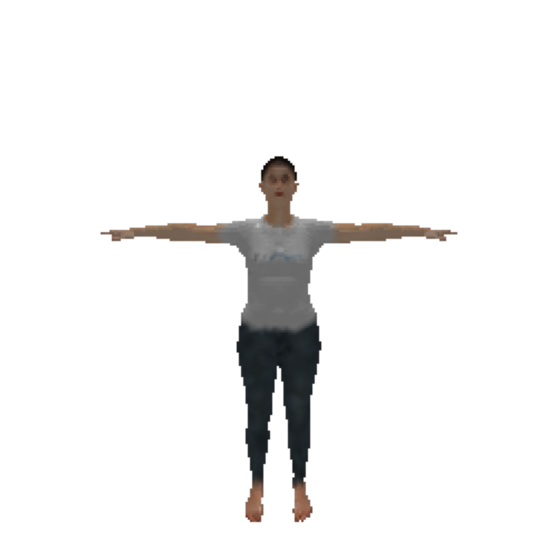

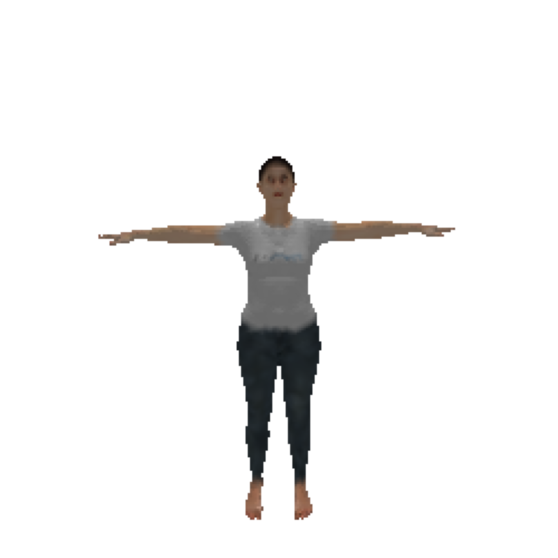

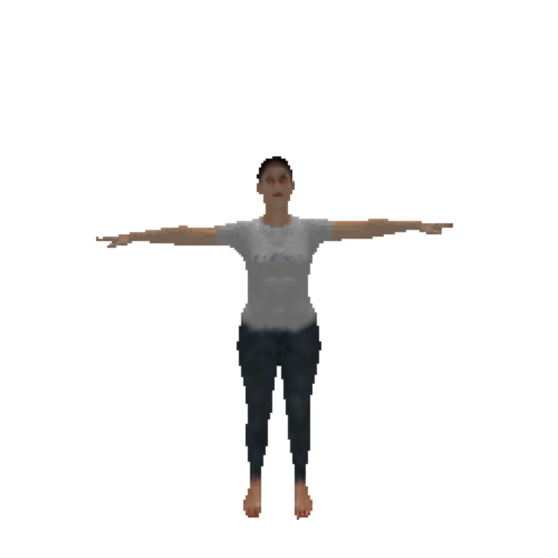

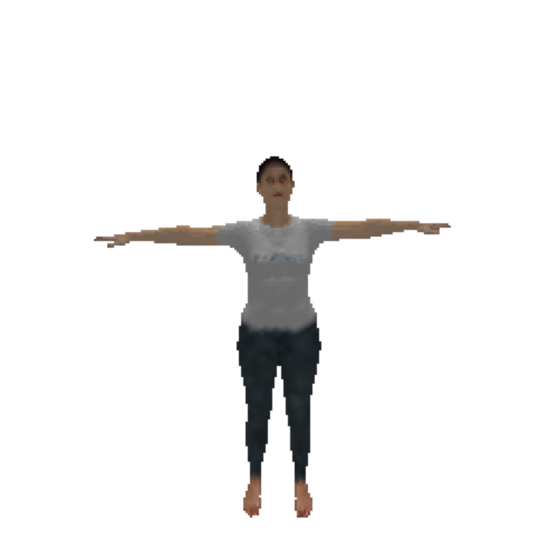

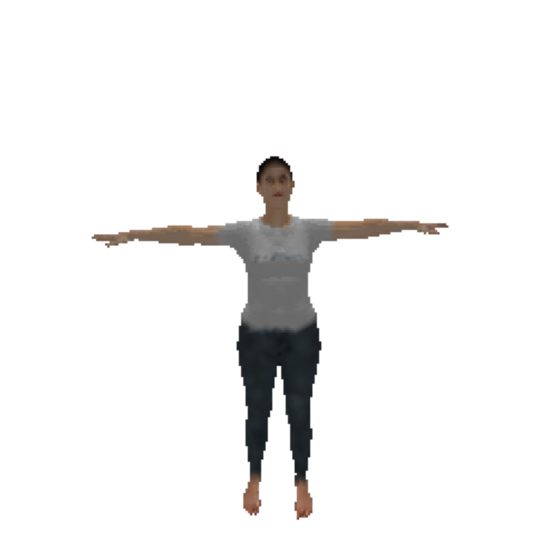

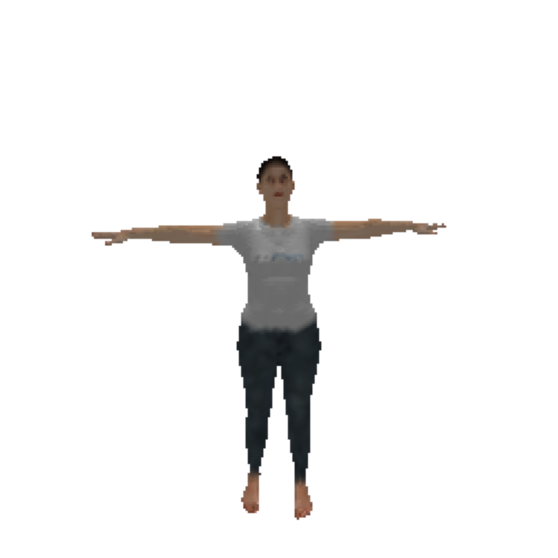

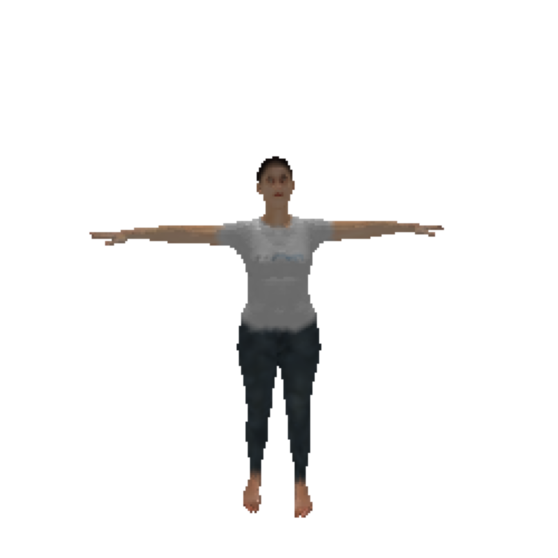

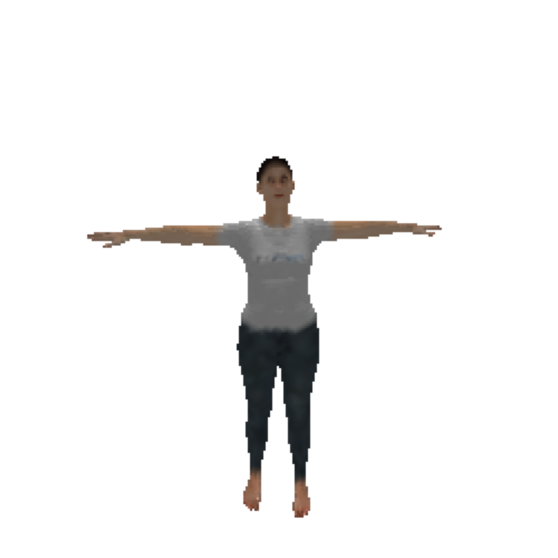

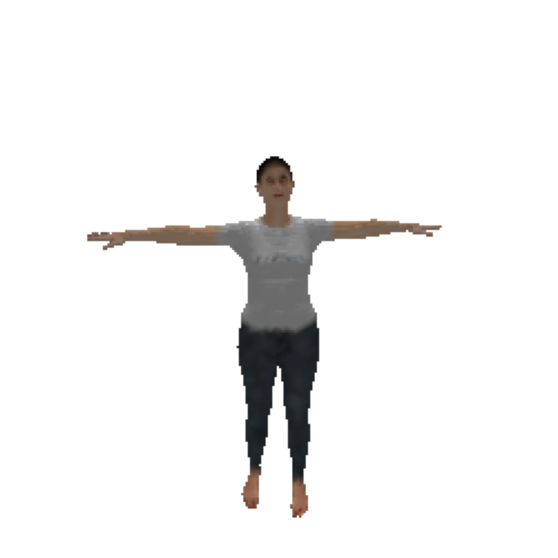

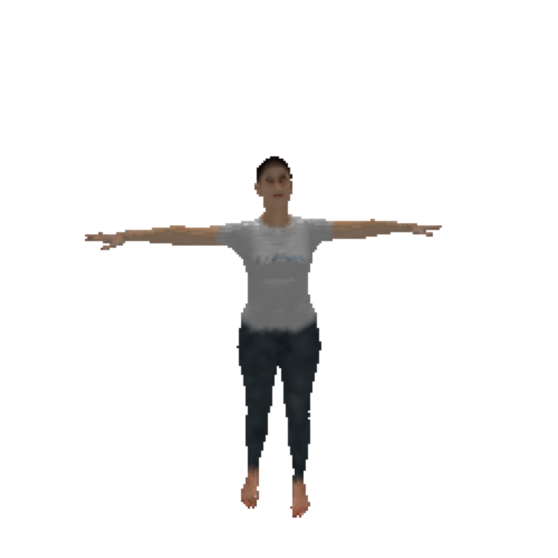

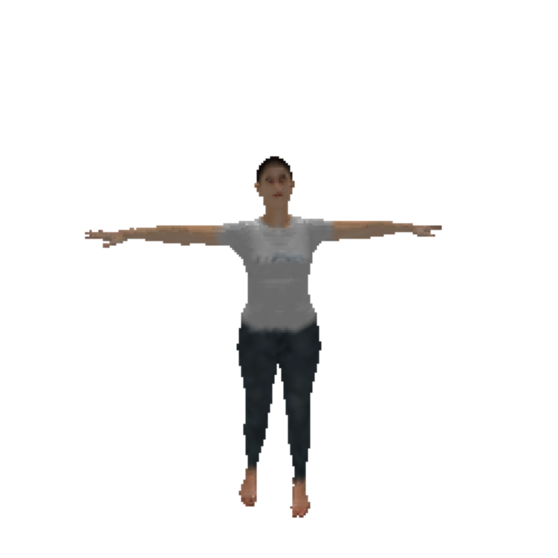

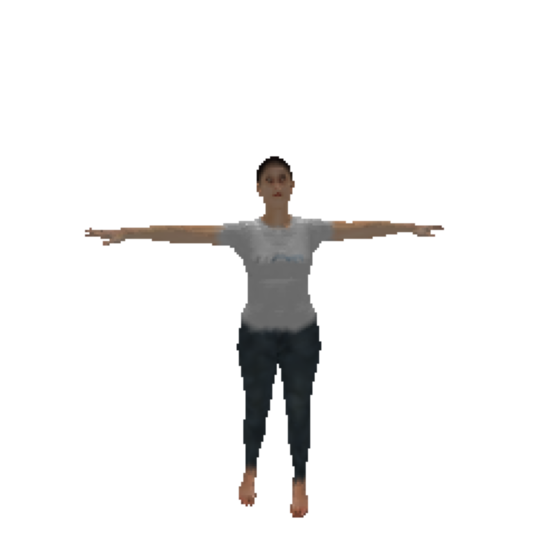

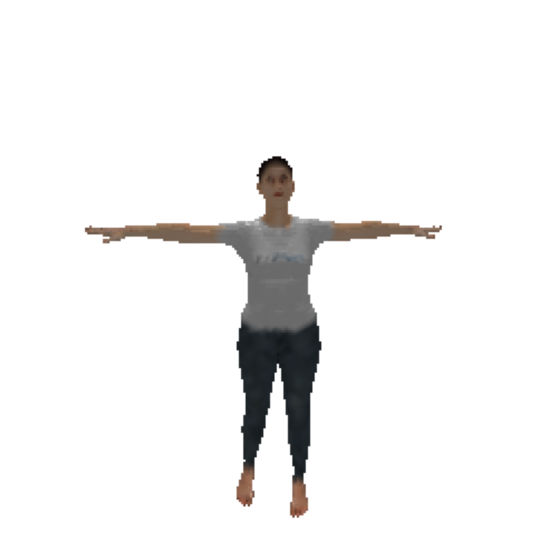

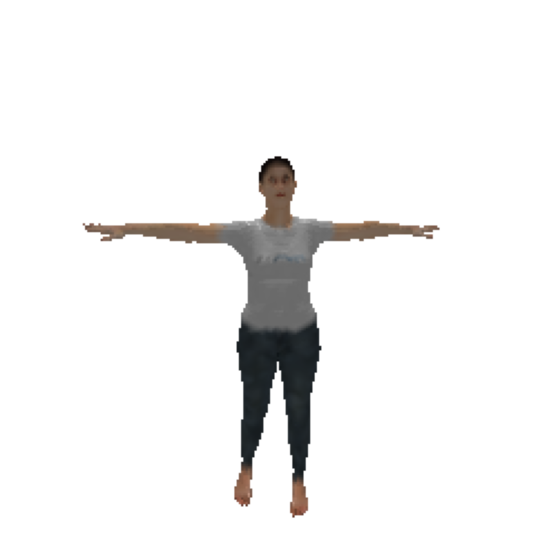

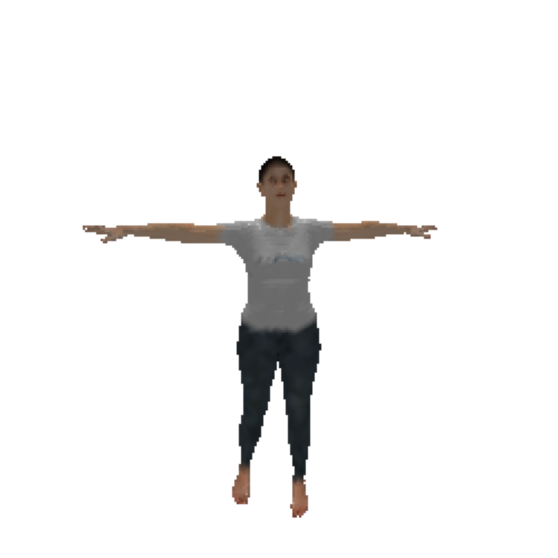

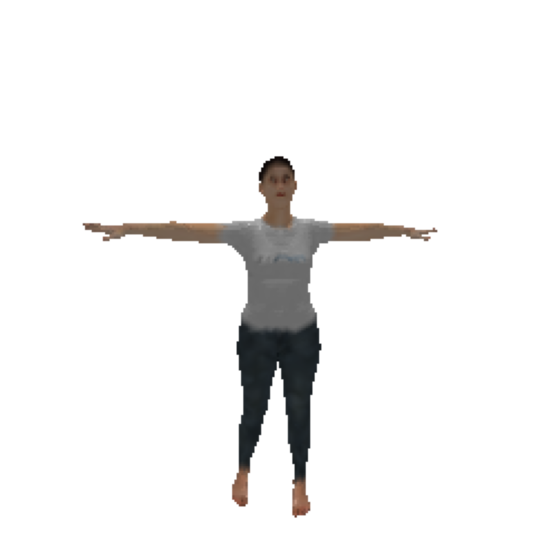

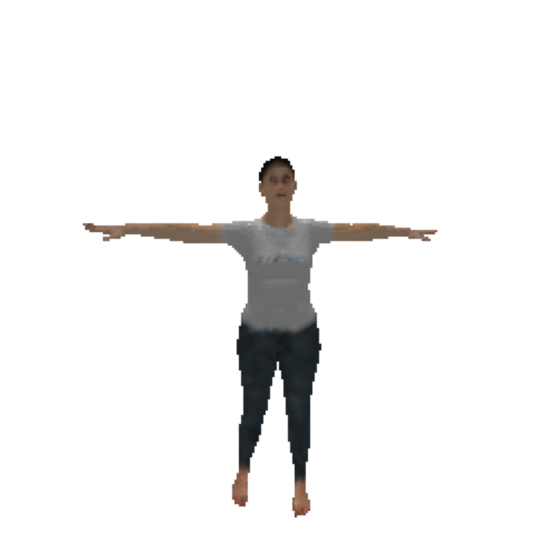

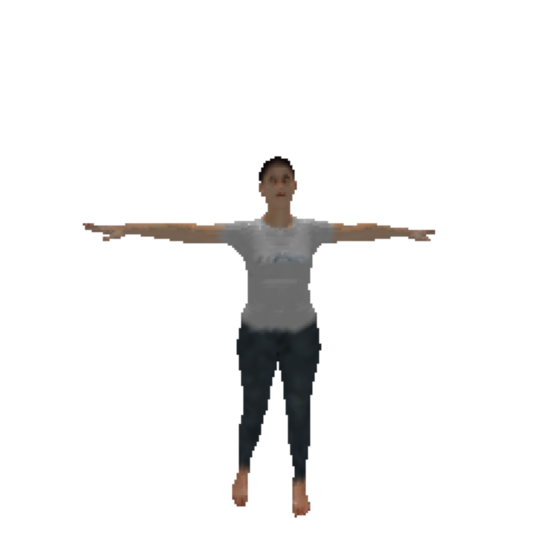

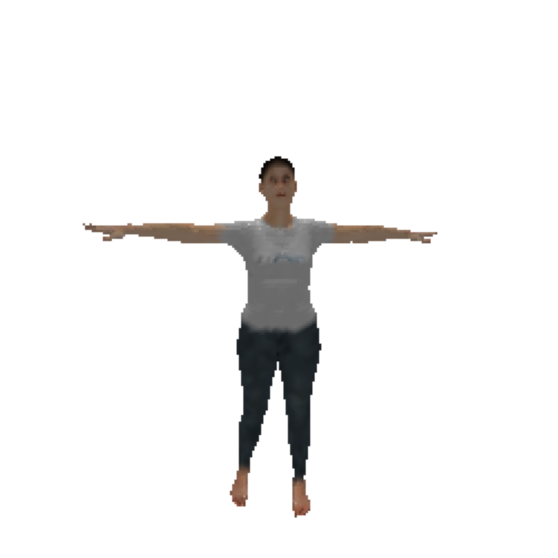

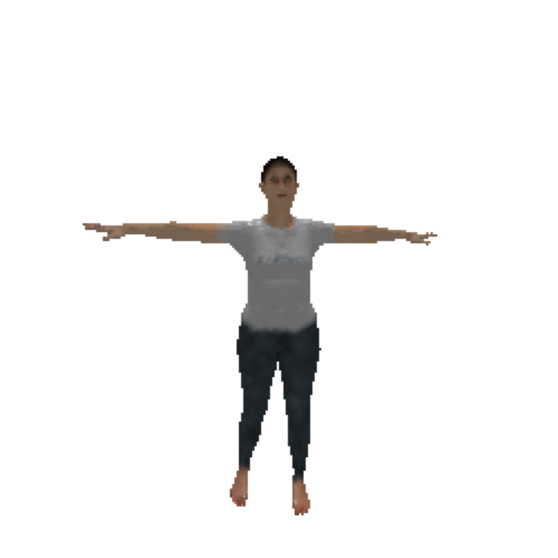

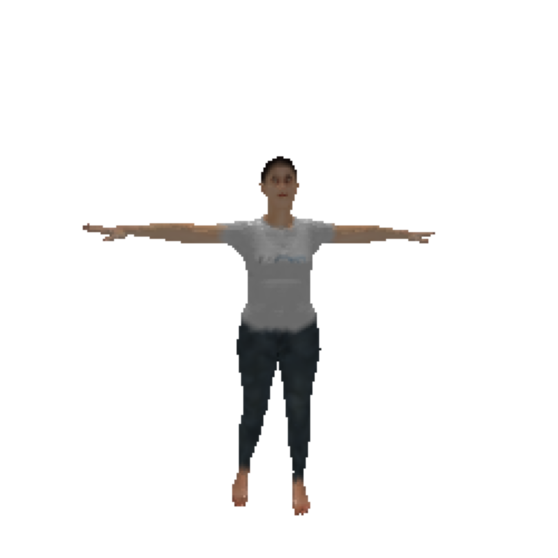

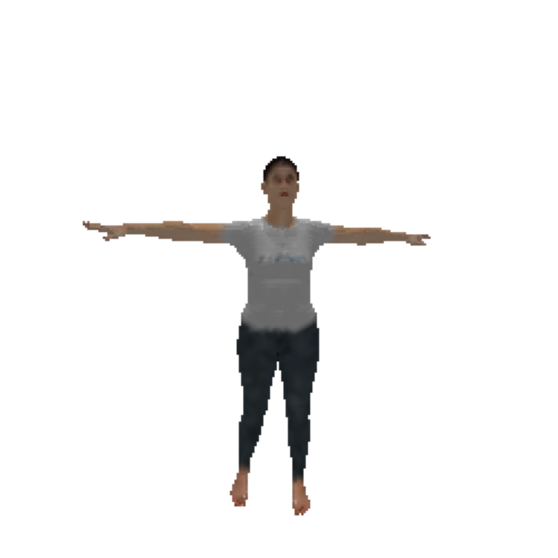

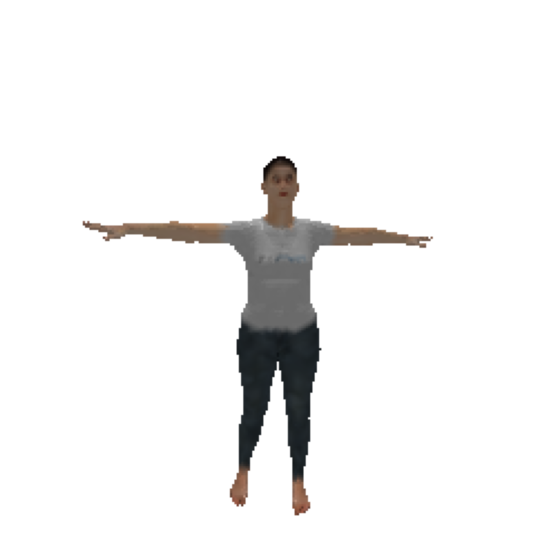

Error in callback <function flush_figures at 0x7f6b7d4f2d30> (for post_execute):


KeyboardInterrupt: ignored

In [76]:
intermediate_views(res_p2_aloe, coords=(2.25, 0, 10))

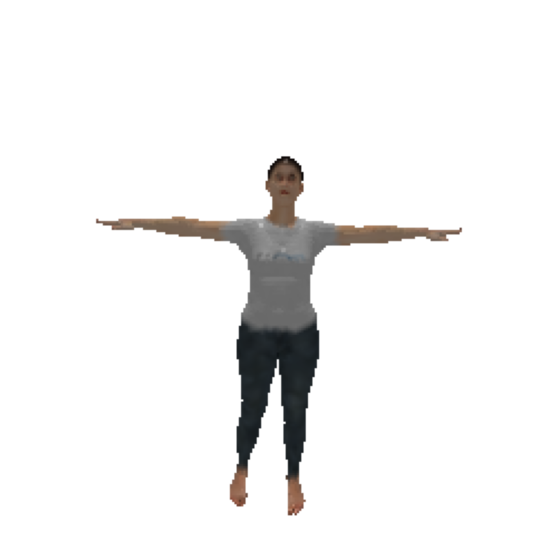

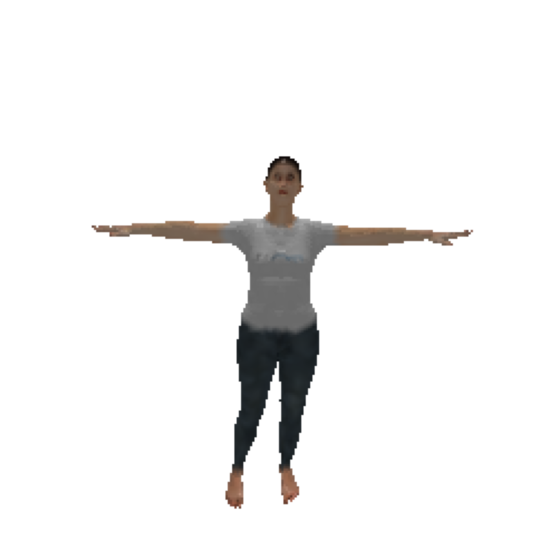

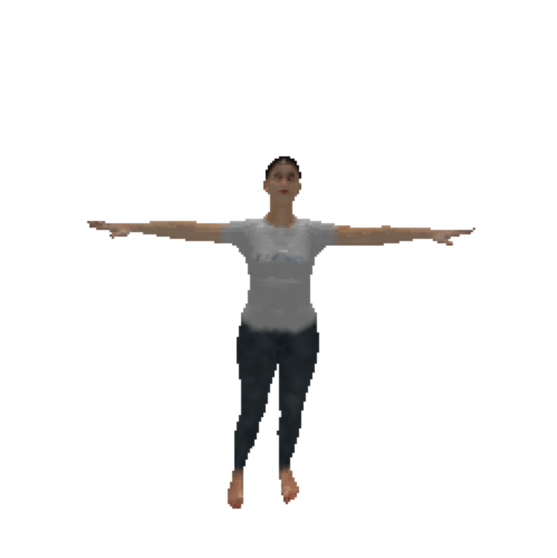

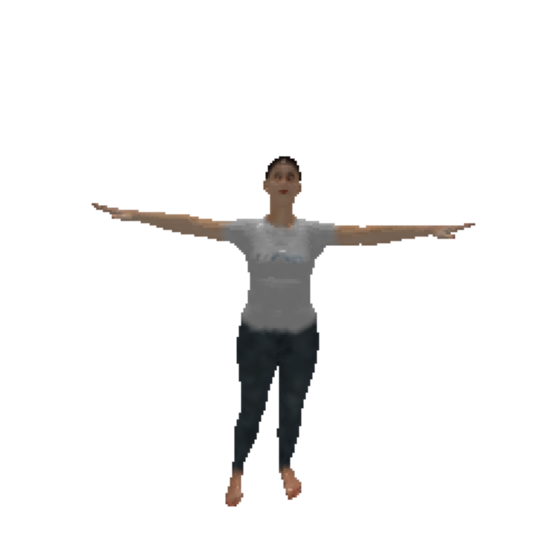

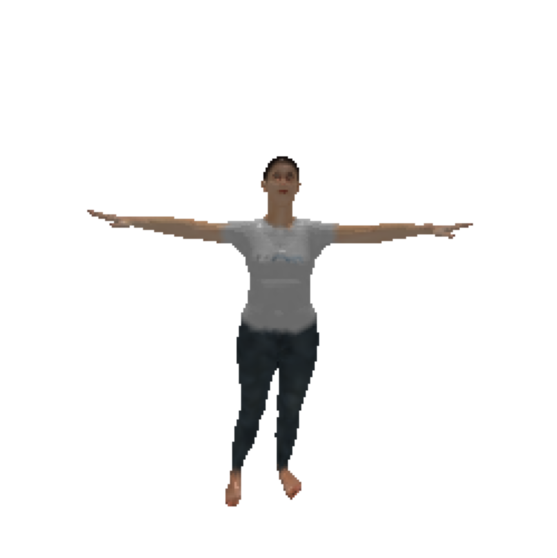

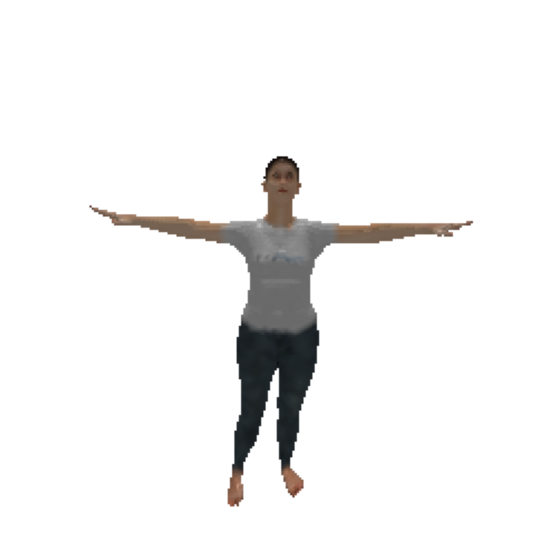

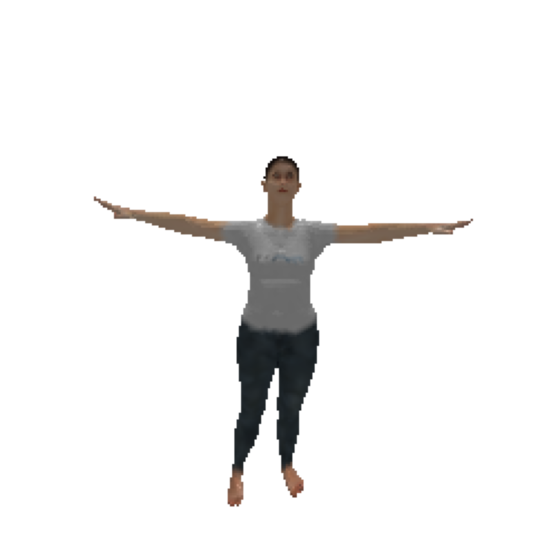

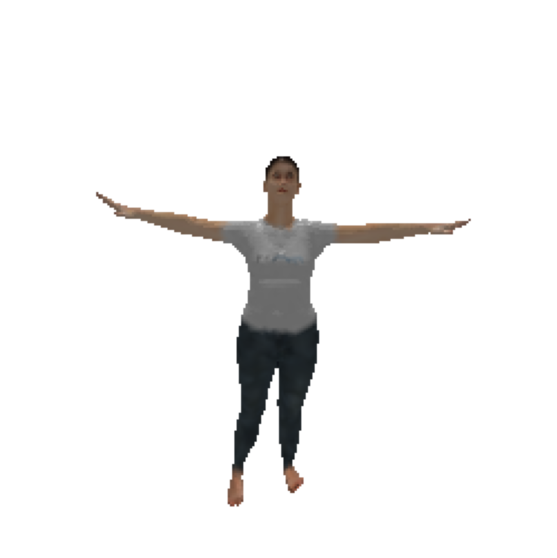

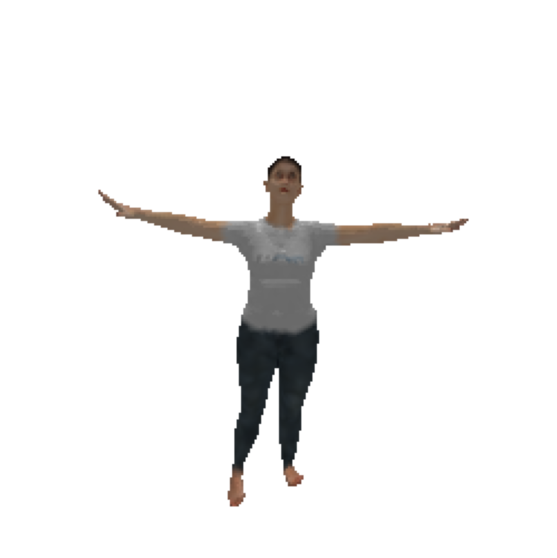

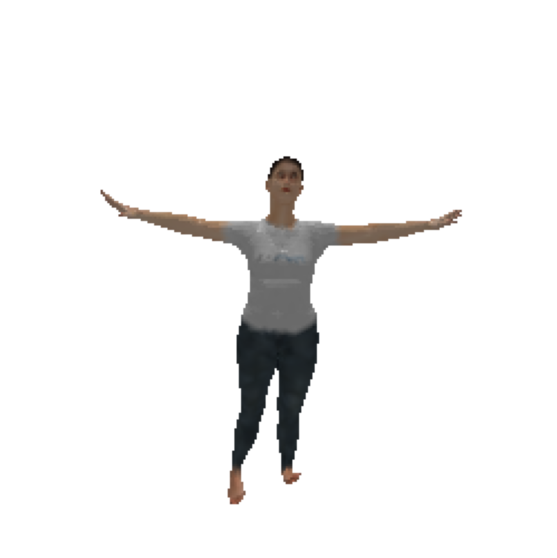

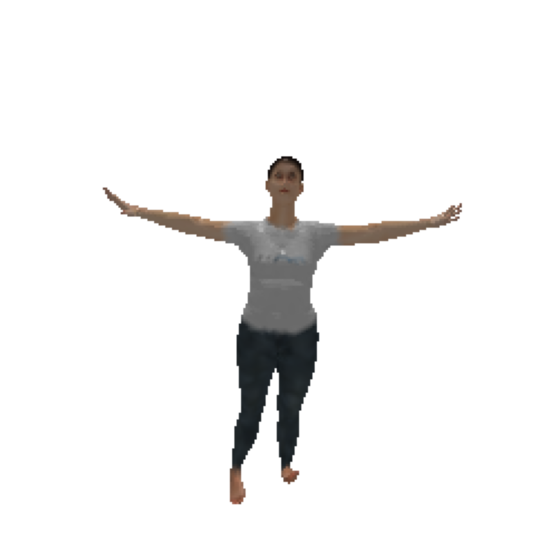

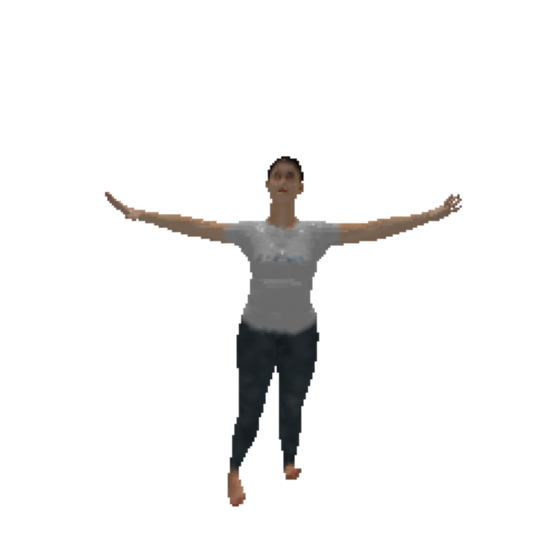

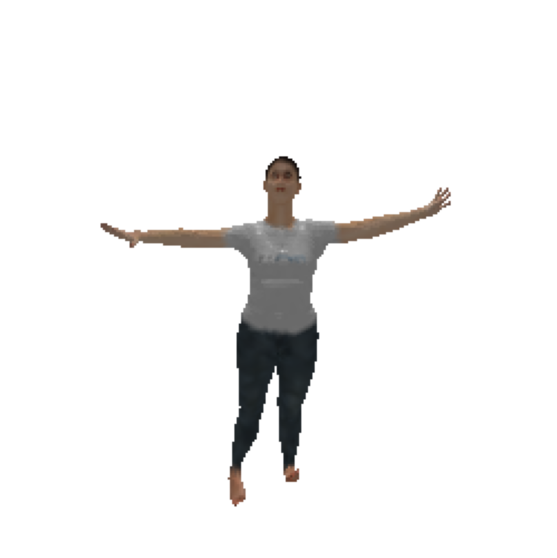

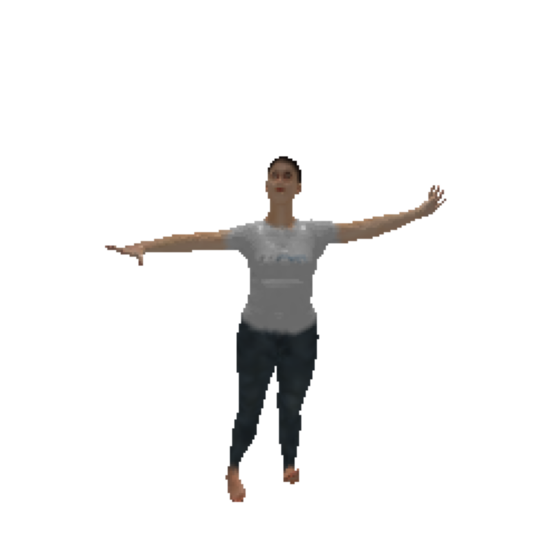

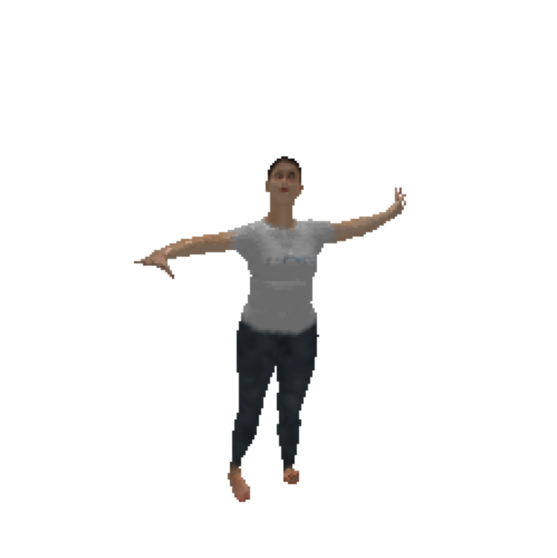

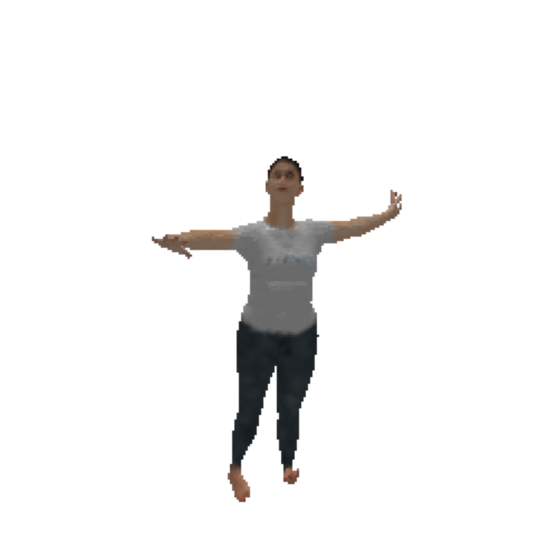

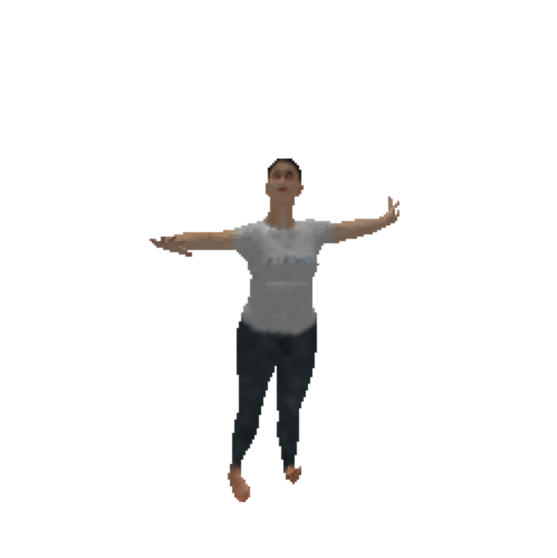

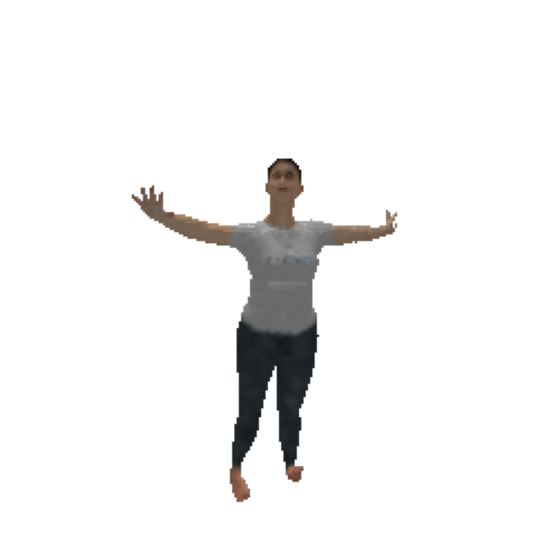

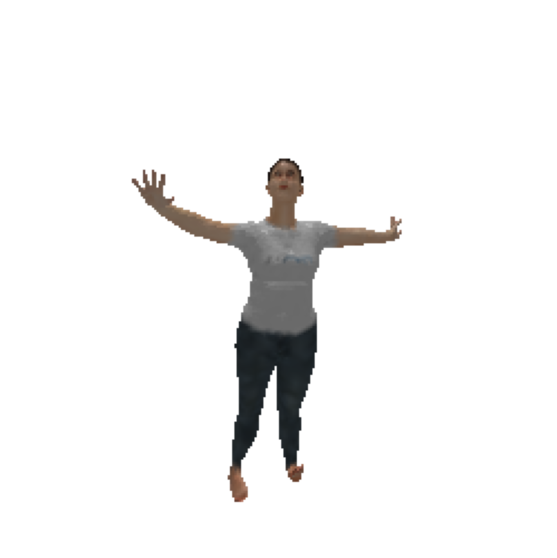

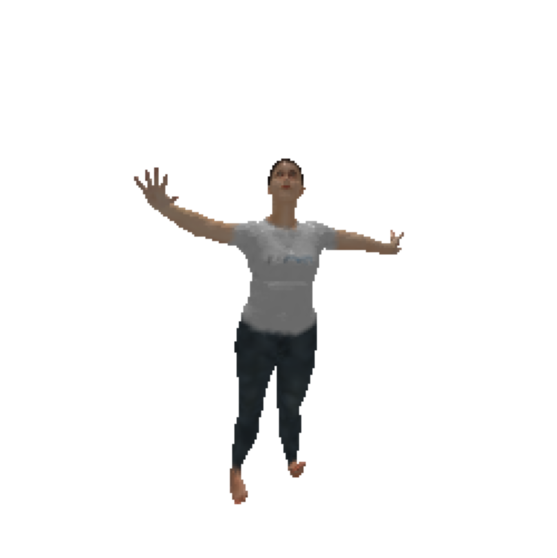

In [ ]:
intermediate_views(p2_result1, coords=(2.25, 0, 10))

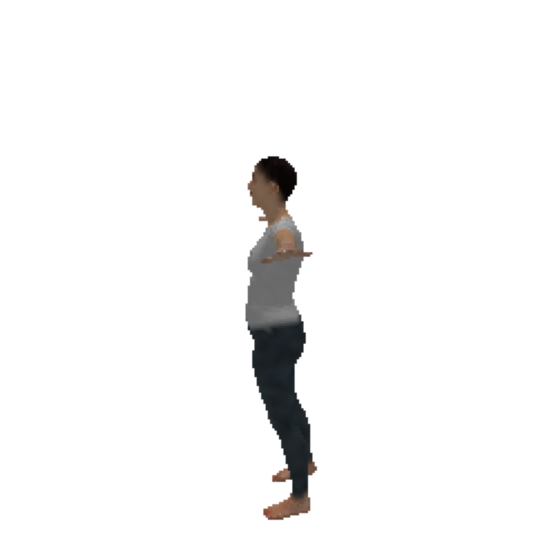

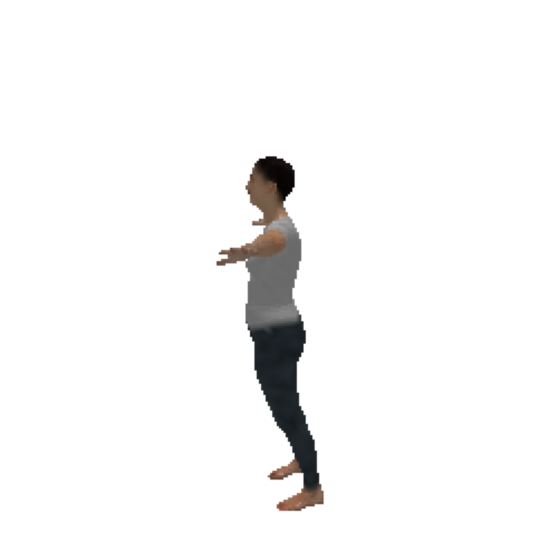

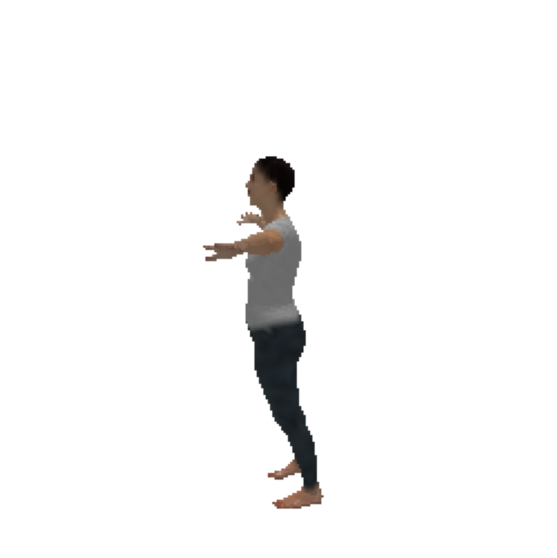

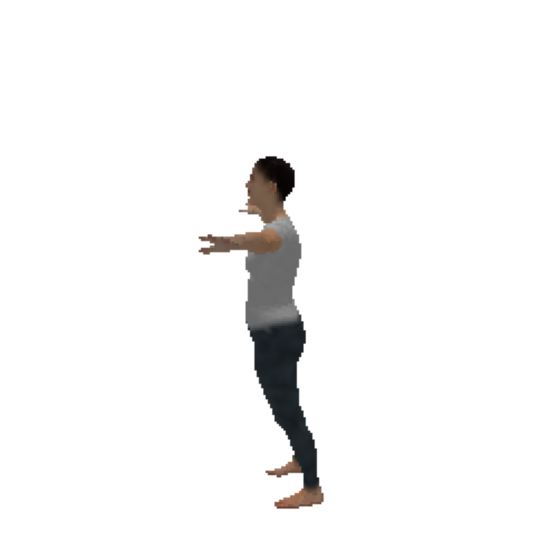

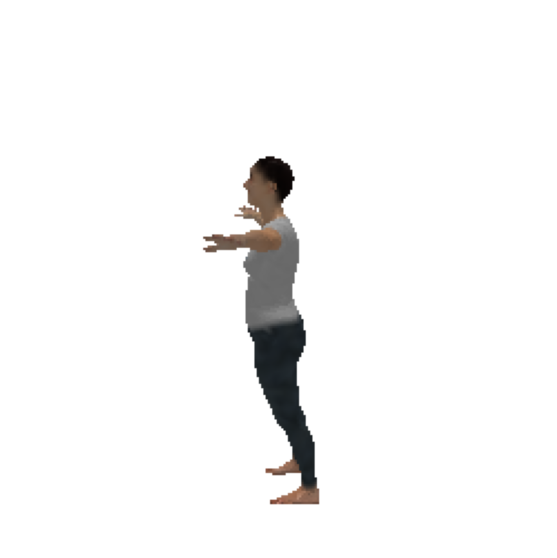

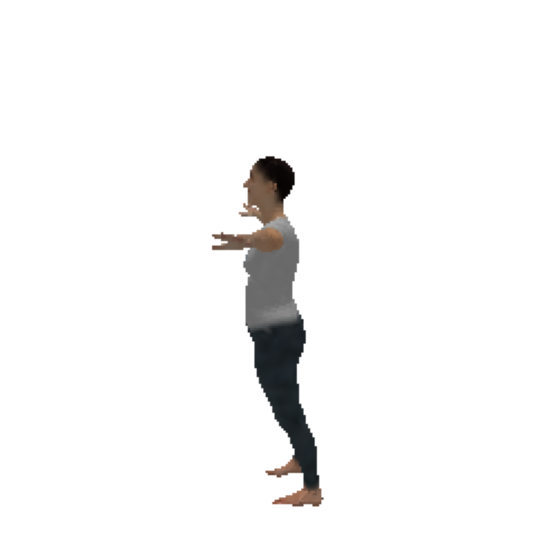

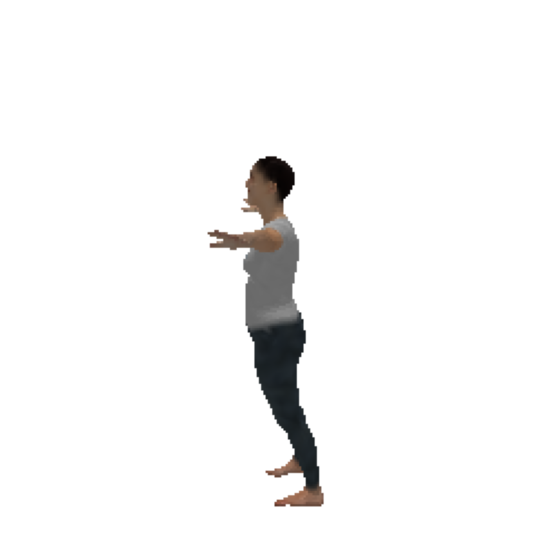

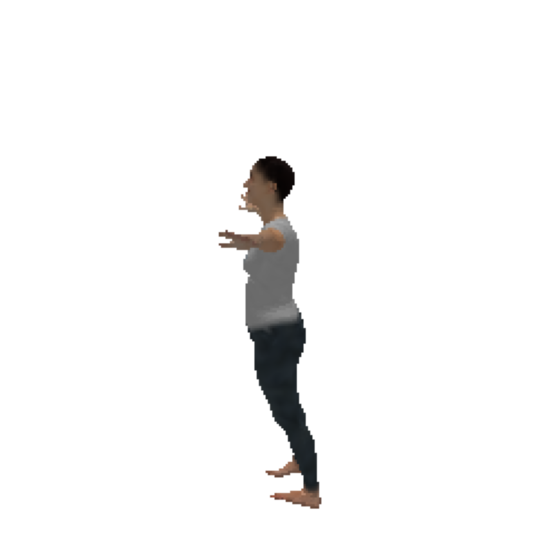

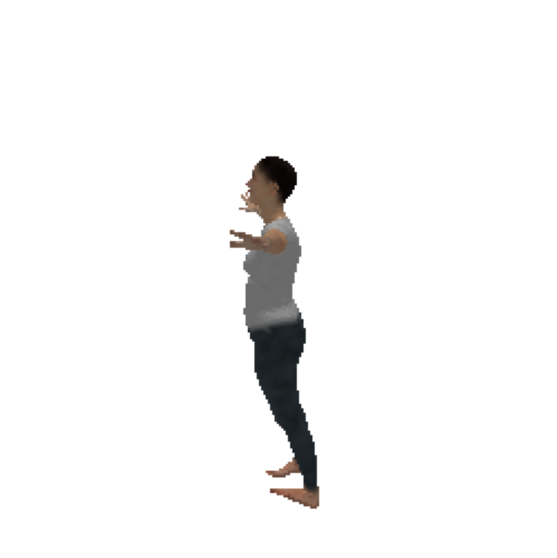

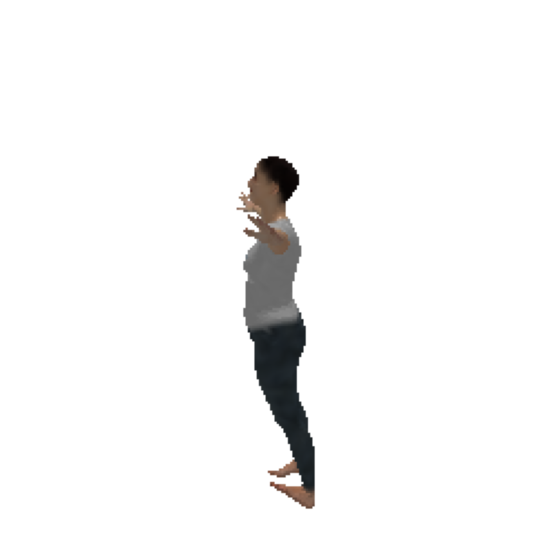

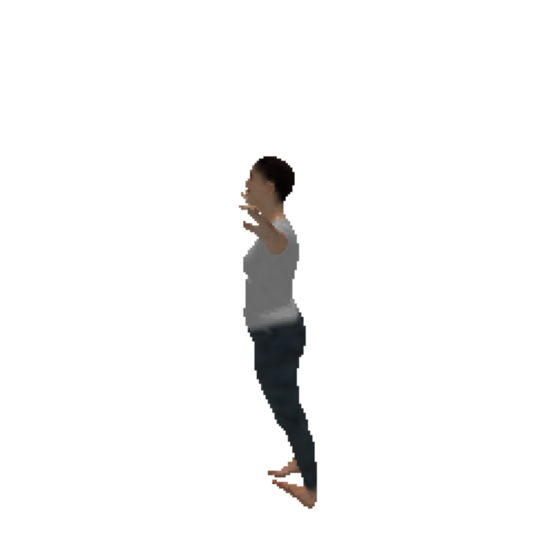

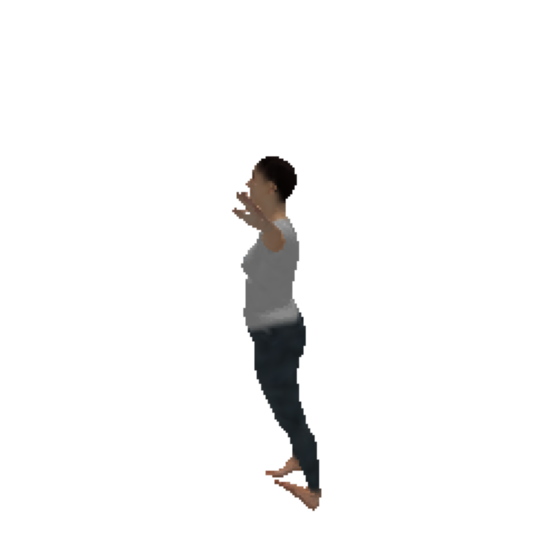

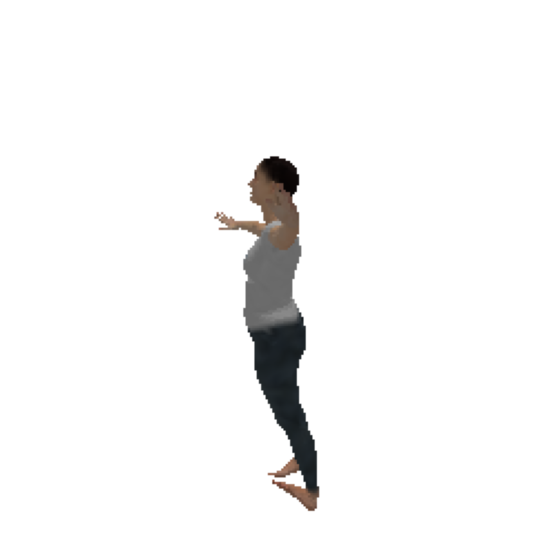

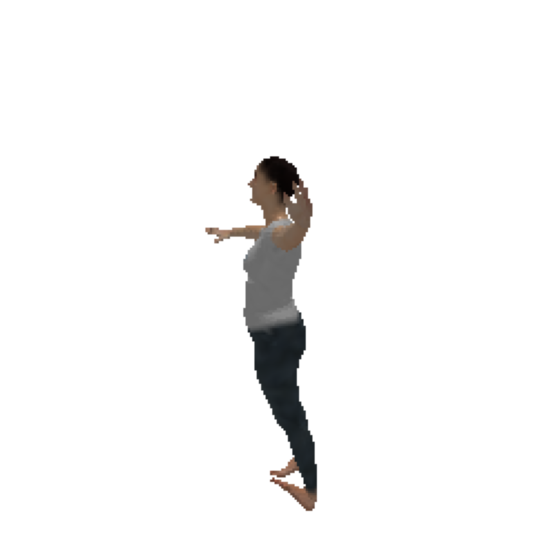

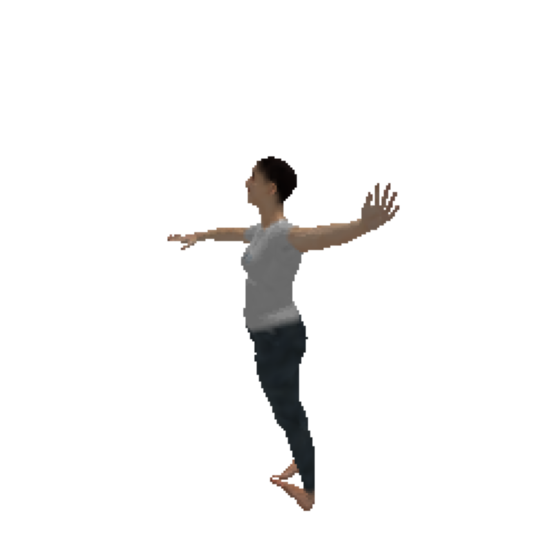

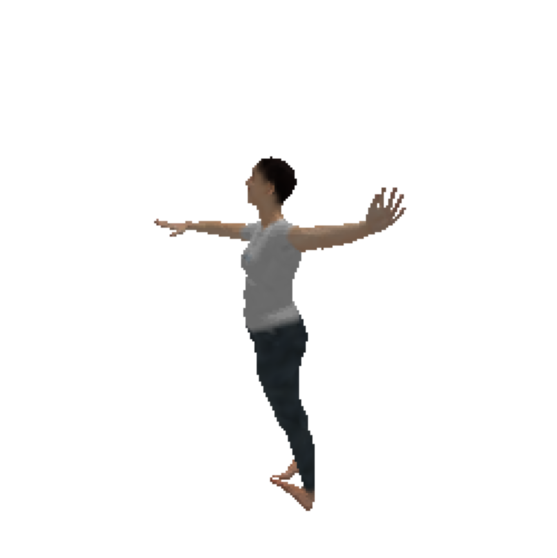

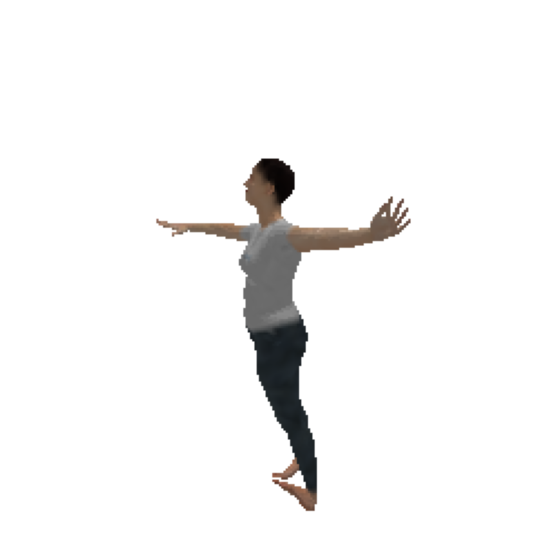

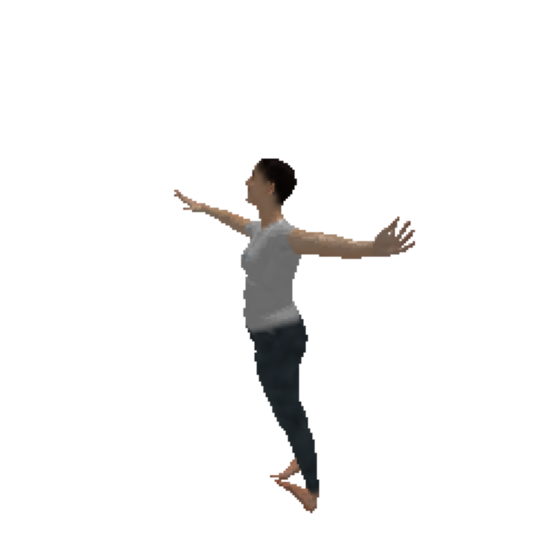

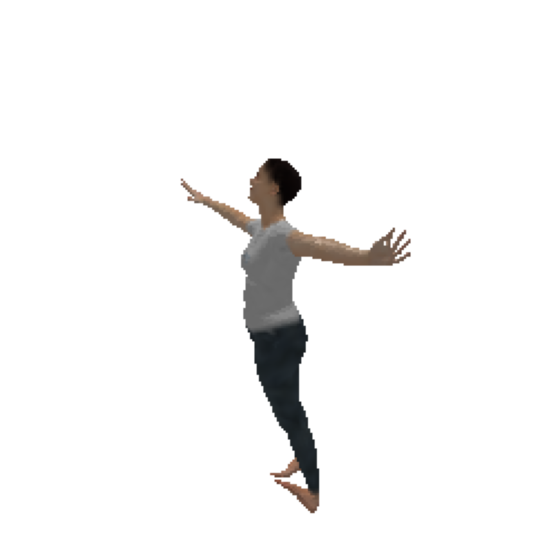

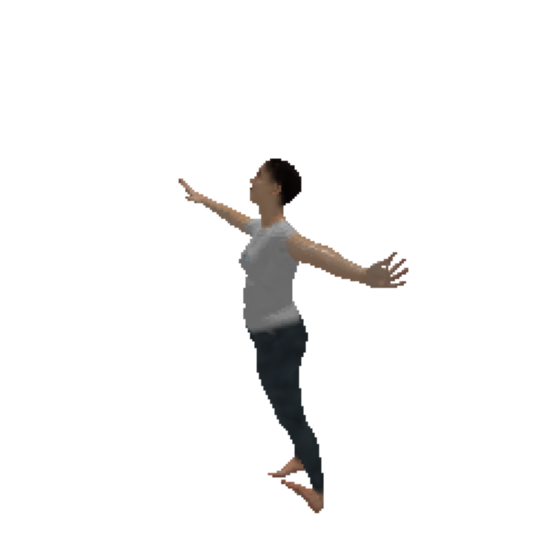

In [ ]:
intermediate_views(p2_result1, coords=(2.25, 90, 10))